json 파일로 변환

In [4]:
import os

def convert_multiple_to_json(xml_dir, json_dir):
    # JSON 파일을 저장할 디렉토리 생성
    os.makedirs(json_dir, exist_ok=True)

    # 디렉토리 내의 모든 XML 파일에 대해 반복
    for xml_file in os.listdir(xml_dir):
        if xml_file.endswith('.xml'):  # XML 파일만 처리
            xml_file_path = os.path.join(xml_dir, xml_file)
            json_file_path = os.path.join(json_dir, xml_file.replace('.xml', '.json'))
            convert_to_json(xml_file_path, json_file_path)

# XML 파일이 있는 디렉토리 경로와 JSON 파일을 저장할 디렉토리 경로를 지정하여 함수 호출
convert_multiple_to_json('/home/sogaksa123/AIFFEL_THON/model/Mask_RCNN/dataset/xml_file', '/home/sogaksa123/AIFFEL_THON/model/Mask_RCNN/dataset/json_file')


엑셀파일 만들기

In [1]:
import xml.etree.ElementTree as ET
import csv
import os

def get_label_number(label):
    if label == "normal":
        return 'normal'
    elif label == "crckles":
        return 'crckles'
    elif label == "wheezes":
        return 'wheezes'
    else:
        return 0  # 다른 라벨은 0으로 처리

# CSV 파일을 열고 CSV writer 객체 생성
with open('/home/sogaksa123/AIFFEL_THON/model/SSD300/train_v.csv', 'w', newline='') as csvfile:  # 출력할 CSV 파일명
    writer = csv.writer(csvfile)

    # CSV 파일의 헤더 작성
    writer.writerow(['image_name', 'xmin', 'xmax', 'ymin', 'ymax', 'class_id'])

    # XML 파일들이 있는 디렉터리 설정
    xml_dir = '/home/sogaksa123/AIFFEL_THON/model/SSD300/dataset/train/xml'  # XML 파일들이 있는 디렉터리명
    xml_files = os.listdir(xml_dir)

    # 각 XML 파일에 대해 처리
    for xml_file in xml_files:
        # XML 파일을 파싱하여 데이터 추출
        tree = ET.parse(os.path.join(xml_dir, xml_file))
        root = tree.getroot()

        # 파일 이름 추출
        file_name = xml_file.split('.')[0] + '.png'  # 확장자를 제외한 파일명

        # XML에서 객체 정보를 추출하여 CSV 파일에 쓰기
        for obj in root.findall('object'):
            label = obj.find('name').text
            label_number = get_label_number(label)
            xmin = int(obj.find('bndbox').find('xmin').text)
            ymin = int(obj.find('bndbox').find('ymin').text)
            xmax = int(obj.find('bndbox').find('xmax').text)
            ymax = int(obj.find('bndbox').find('ymax').text)

            # CSV 파일에 한 행으로 쓰기
            writer.writerow([file_name, xmin, xmax, ymin, ymax, label_number])


In [3]:
import xml.etree.ElementTree as ET
import csv
import os

def get_label_number(label):
    if label == "normal":
        return 'normal'
    elif label == "crckles":
        return 'crckles'
    elif label == "wheezes":
        return 'wheezes'
    else:
        return 0  # 다른 라벨은 0으로 처리

# CSV 파일을 열고 CSV writer 객체 생성
with open('/home/sogaksa123/AIFFEL_THON/model/efficientdet/train.csv', 'a', newline='') as csvfile:  # 추가할 CSV 파일명
    writer = csv.writer(csvfile)

    # XML 파일들이 있는 디렉터리 설정
    xml_dir = '/home/sogaksa123/AIFFEL_THON/model/SSD300/dataset/val/xml'  # XML 파일들이 있는 디렉터리명
    xml_files = os.listdir(xml_dir)

    # 각 XML 파일에 대해 처리
    for xml_file in xml_files:
        # XML 파일을 파싱하여 데이터 추출
        tree = ET.parse(os.path.join(xml_dir, xml_file))
        root = tree.getroot()

        # 파일 이름 추출
        file_name = xml_file.split('.')[0] + '.png'  # 확장자를 제외한 파일명

        # XML에서 객체 정보를 추출하여 CSV 파일에 쓰기
        for obj in root.findall('object'):
            label = obj.find('name').text
            label_number = get_label_number(label)
            xmin = int(obj.find('bndbox').find('xmin').text)
            ymin = int(obj.find('bndbox').find('ymin').text)
            xmax = int(obj.find('bndbox').find('xmax').text)
            ymax = int(obj.find('bndbox').find('ymax').text)

            # CSV 파일에 한 행으로 쓰기
            writer.writerow([file_name, xmin, xmax, ymin, ymax, label_number])


submission.csv만들기

In [1]:
import xml.etree.ElementTree as ET
import csv
import os

def get_label_number(label):
    if label == "normal":
        return 'normal'
    elif label == "crckles":
        return 'crckles'
    elif label == "wheezes":
        return 'wheezes'
    else:
        return 0  # 다른 라벨은 0으로 처리

csv_file_path = '/home/sogaksa123/AIFFEL_THON/model/SSD300/submission.csv'
xml_dir = '/home/sogaksa123/AIFFEL_THON/model/SSD300/dataset/test/xml'

# CSV 파일이 존재하지 않으면 첫 번째 줄에 열의 제목을 작성
if not os.path.exists(csv_file_path):
    with open(csv_file_path, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['image_name', 'xmin', 'xmax', 'ymin', 'ymax', 'class_id'])

# CSV 파일 열기
with open(csv_file_path, 'a', newline='') as csvfile:
    writer = csv.writer(csvfile)

    # 각 XML 파일에 대해 처리
    for xml_file in os.listdir(xml_dir):
        # XML 파일을 파싱하여 데이터 추출
        tree = ET.parse(os.path.join(xml_dir, xml_file))
        root = tree.getroot()

        # 파일 이름 추출
        file_name = xml_file.split('.')[0] + '.png'  # 확장자를 제외한 파일명

        # CSV 파일에 한 행으로 쓰기 (첫 번째 행에는 열의 제목만 쓰기)
        writer.writerow([file_name, '', '', '', '', ''])  # 이미지 파일 이름만 포함하고 나머지는 빈 문자열


###import Libraries and Directories

In [1]:
import pandas as pd
import numpy as np
import cv2
import json
import os
import matplotlib.pyplot as plt
import random
import seaborn as sns
from keras.models import Sequential
from keras import optimizers
from keras import backend as K
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
directory = "/home/sogaksa123/AIFFEL_THON/model/Mask_RCNN/dataset/json_file"
image_directory = "/home/sogaksa123/AIFFEL_THON/model/Mask_RCNN/dataset/png_file"
df = pd.read_csv("/home/sogaksa123/AIFFEL_THON/model/SSD300/train_v.csv")
df_test = pd.read_csv('/home/sogaksa123/AIFFEL_THON/model/SSD300/submission.csv')

2024-04-08 09:57:48.848012: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-08 09:57:48.910752: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-08 09:57:49.985429: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
def getJSON(filePathandName):
    with open(filePathandName,'r') as f:
        return json.load(f)

In [3]:
def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)])
    return cv2.LUT(image.astype(np.uint8), table.astype(np.uint8))

In [4]:
jsonfiles = []
for filename in os.listdir(directory):
    filepath = os.path.join(directory, filename)
    if os.path.isfile(filepath) and filename.endswith('.json'):
        jsonfiles.append(getJSON(filepath))

In [5]:
jsonfiles[0]

{'annotation': {'folder': 'png_files',
  'filename': '114_1b4_Lr_mc_AKGC417L_1.png',
  'path': '/home/sogaksa123/AIFFEL_THON/data/dataset5_0403/filtering5_1280/png_files/114_1b4_Lr_mc_AKGC417L_1.png',
  'source': {'database': 'ICBHI'},
  'size': {'width': '224', 'height': '224', 'depth': '3'},
  'segmented': '0',
  'object': [{'name': 'crckles',
    'pose': 'Unspecified',
    'truncated': '0',
    'difficult': '0',
    'bndbox': {'xmin': '0', 'ymin': '56', 'xmax': '76', 'ymax': '218'}},
   {'name': 'crckles',
    'pose': 'Unspecified',
    'truncated': '0',
    'difficult': '0',
    'bndbox': {'xmin': '76', 'ymin': '56', 'xmax': '179', 'ymax': '218'}},
   {'name': 'crckles',
    'pose': 'Unspecified',
    'truncated': '0',
    'difficult': '0',
    'bndbox': {'xmin': '179', 'ymin': '56', 'xmax': '224', 'ymax': '218'}},
   {'name': 'wheezes',
    'pose': 'Unspecified',
    'truncated': '0',
    'difficult': '0',
    'bndbox': {'xmin': '0', 'ymin': '56', 'xmax': '76', 'ymax': '218'}},
  

In [6]:
df = pd.read_csv("/home/sogaksa123/AIFFEL_THON/model/SSD300/train_v.csv")
df.head()

,image_name,xmin,xmax,ymin,ymax,class_id
0,170_1b4_Ar_mc_AKGC417L_2.png,52,155,56,218,crckles
1,170_1b4_Ar_mc_AKGC417L_2.png,0,52,56,218,wheezes
2,170_1b4_Ar_mc_AKGC417L_2.png,52,155,56,218,wheezes
3,164_1b1_Ll_sc_Meditron_0.png,123,214,56,218,crckles
4,164_1b1_Ll_sc_Meditron_0.png,22,69,56,218,wheezes


In [7]:
data = []
img_size = 224
normal = ['normal']
crckles = ["crckles"]
wheezes = ['wheezes']
labels = {'normal': 0, 'crckles': 1, 'wheezes': 2}

for i in df["image_name"].unique():
    # 파일 이름에서 확장자 부분을 제거하여 JSON 파일 경로를 생성
    filename = i.split('.')[0] + '.json'
    json_file_path = os.path.join(directory, filename)

    # JSON 파일을 읽고 처리
    if os.path.exists(json_file_path):
        json_data = getJSON(json_file_path)
        
        # "annotation" 키의 값이 딕셔너리인지 확인
        if isinstance(json_data.get("annotation", {}), dict):
            # "annotation" 키의 값이 딕셔너리인 경우에는 하나의 객체로 간주
            annotations = [json_data.get("annotation", {})]
        else:
            # "annotation" 키의 값이 딕셔너리가 아닌 경우, 리스트로 처리
            annotations = json_data.get("annotation", [])
        
        for annotation in annotations:
            objects = annotation.get("object", [])
            if isinstance(objects, dict):
                # "object" 키의 값이 딕셔너리인 경우에는 하나의 객체로 간주
                objects = [objects]
            
            for j in objects:
                classname = j.get("name", "")
                if classname in normal:
                    x, y, w, h = map(int, [j["bndbox"][key] for key in ["xmin", "ymin", "xmax", "ymax"]])
                    img = cv2.imread(os.path.join(image_directory, i), 1)
                    img = img[y:h, x:w]
                    img = cv2.resize(img, (img_size, img_size))
                    data.append([img, labels["normal"]])
                elif classname in crckles:
                    x, y, w, h = map(int, [j["bndbox"][key] for key in ["xmin", "ymin", "xmax", "ymax"]])
                    img = cv2.imread(os.path.join(image_directory, i), 1)
                    img = img[y:h, x:w]
                    img = cv2.resize(img, (img_size, img_size))
                    data.append([img, labels["crckles"]])
                elif classname in wheezes:
                    x, y, w, h = map(int, [j["bndbox"][key] for key in ["xmin", "ymin", "xmax", "ymax"]])
                    img = cv2.imread(os.path.join(image_directory, i), 1)
                    img = img[y:h, x:w]
                    img = cv2.resize(img, (img_size, img_size))
                    data.append([img, labels["wheezes"]])
    else:
        print(f"JSON 파일이 없음: {json_file_path}")

random.shuffle(data)


In [8]:
len(data)

6754

<Axes: xlabel='count'>

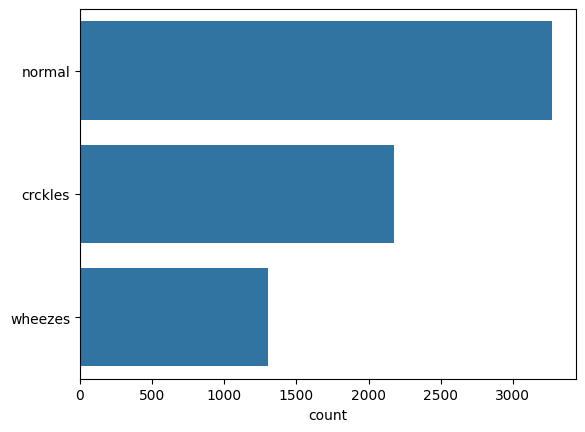

In [9]:
p = []
for f in data:
    if(f[1] == 0):
        p.append("normal")
    elif(f[1] == 1) :
        p.append("crckles")
    else :
        p.append("wheezes")
sns.countplot(p)

In [10]:
X = []
Y = []
for features,label in data:
    X.append(features)
    Y.append(label)

In [11]:
X[0].shape

(224, 224, 3)

In [12]:
X = np.array(X)/255.0
X = X.reshape(-1,224,224,3)
Y = np.array(Y)

In [13]:
np.unique(Y)

array([0, 1, 2])

In [14]:
Y.shape

(6754,)

Model Architecture and Training Process

In [15]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding="same", activation='relu', input_shape=(224,224,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))


/home/sogaksa123/anaconda3/envs/sogaksa/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
2024-04-08 09:58:36.767466: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 222, 222, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 220, 220, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 110, 110, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1548800)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1548800)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │    77,440,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,533,451 (295.77 MB)

 Trainable params: 77,533,451 (295.77 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
xtrain,xval,ytrain,yval=train_test_split(X, Y,train_size=0.8,random_state=0)

In [19]:
type(ytrain)

numpy.ndarray

In [20]:
xtrain.shape[0]

5403

데이터 불균형 조정

In [22]:
from sklearn.utils import class_weight
from keras.utils import to_categorical
batch_size = 16
epochs = 50

# 타겟 데이터를 원-핫 인코딩
num_classes = 3
ytrain_encoded = to_categorical(ytrain, num_classes=num_classes)
yval_encoded = to_categorical(yval, num_classes=num_classes)

# 모델 훈련
history = model.fit(
    xtrain, ytrain_encoded,
    validation_data=(xval, yval_encoded),
    batch_size=batch_size,
    epochs=epochs
)


Epoch 1/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 487s 1s/step - accuracy: 0.4636 - loss: 1.8097 - val_accuracy: 0.4626 - val_loss: 1.0458
Epoch 2/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 484s 1s/step - accuracy: 0.4976 - loss: 1.0334 - val_accuracy: 0.4626 - val_loss: 1.0432
Epoch 3/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 485s 1s/step - accuracy: 0.5024 - loss: 1.0286 - val_accuracy: 0.4626 - val_loss: 1.0433
Epoch 4/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 485s 1s/step - accuracy: 0.4946 - loss: 1.0302 - val_accuracy: 0.4626 - val_loss: 1.0434
Epoch 5/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 485s 1s/step - accuracy: 0.4861 - loss: 1.0338 - val_accuracy: 0.4626 - val_loss: 1.0441
Epoch 6/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 485s 1s/step - accuracy: 0.4842 - loss: 1.0381 - val_accuracy: 0.4626 - val_loss: 1.0438
Epoch 7/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 485s 1s/step - accuracy: 0.4836 - loss: 1.0394 - val_accuracy: 0.4626 - val_loss: 1.0440
Epoch 8/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 485s 1s/step - accuracy: 0.4916 - loss: 1.0332 - val_accu

KeyboardInterrupt: 

Training and Validation Visualizations

In [ ]:
plt.plot(history.history['accuracy'],'g')
plt.plot(history.history['val_accuracy'],'b')
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

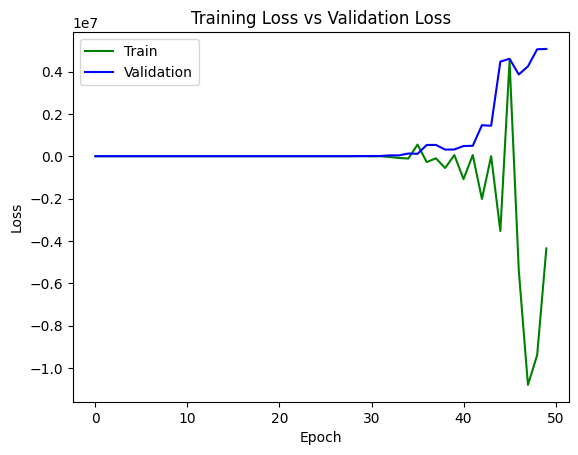

In [22]:
plt.plot(history.history['loss'],'g')
plt.plot(history.history['val_loss'],'b')
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Model Testing

In [23]:
print(len(df_test["image_name"]),len(df_test["image_name"].unique()))

NameError: name 'df_test' is not defined

In [5]:
test_images = ['103_2b2_Ar_mc_LittC2SE_0.png','110_1b1_Pr_sc_Meditron_10.png', '112_1p1_Pr_sc_Litt3200_2.png','134_2b2_Al_mc_LittC2SE_1.png','139_1b1_Al_sc_Litt3200_1.png','158_1p2_Al_mc_AKGC417L_0.png']

In [ ]:
gamma = 2.0
fig = plt.figure(figsize = (14,14))
rows = 3
cols = 2
axes = []
assign = { 0 :'normal', 1 : 'crckles', 2 : 'wheezes'}
for j,im in enumerate(test_images):
    image =  cv2.imread(os.path.join(image_directory,im),1)
    image =  adjust_gamma(image, gamma=gamma)
    (h, w) = image.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(image, (300,300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
    cvNet.setInput(blob)
    detections = cvNet.forward()
    for i in range(0, detections.shape[2]):
        try:
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")
            frame = image[startY:endY, startX:endX]
            confidence = detections[0, 0, i, 2]
            if confidence > 0.2:
                im = cv2.resize(frame,(img_size,img_size))
                im = np.array(im)/255.0
                im = im.reshape(1,124,124,3)
                result = model.predict(im)
                if result>0.5:
                    label_Y = 1
                else:
                    label_Y = 0
                cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
                cv2.putText(image,assign[str(label_Y)] , (startX, startY-10), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (36,255,12), 2)
        
        except:pass
    axes.append(fig.add_subplot(rows, cols, j+1))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()